# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import os
import shutil
import math

from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
%matplotlib inline


# Import Sample Rinse Data

0     1480
1     1072
2      760
3      712
4      728
      ... 
73     224
74      88
75      40
76      24
77      24
Name: col2 , Length: 78, dtype: int64
Max height:  1480  - Length:  78


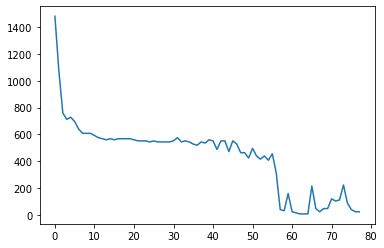

In [84]:
#cols = ['model']
data = pd.read_csv("Test\\" + "Rinse4.csv")

rinse_data = data['col2 ']

rinse_max = max(rinse_data)
rinse_len = len(rinse_data)

rinse_data = rinse_data[rinse_data.idxmax(rinse_max):rinse_len]

rinse_data.reset_index(drop=True, inplace=True)

rinse_len = len(rinse_data)

print(rinse_data)


plt.plot(rinse_data)

print("Max height: ", rinse_max, " - Length: ", rinse_len)



# Import Model

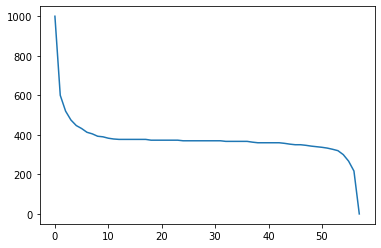

In [77]:
cols = ['model']
data = pd.read_csv('generic_model.csv', usecols = cols)
col = data['model']

new_peak = rinse_max

height_ratio = new_peak/max(col)

#x = plt.figure(figsize=(10, 10))
plt.plot(col)

# Scale Model Height 

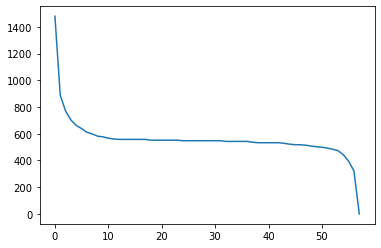

In [78]:
i = 0

#scale model to correct height
while (i<col.size):
    col.loc[i] = int(round(col.loc[i]*height_ratio))
    i+=1
    
plt.plot(col)

# Step through model at scaled increments

Model Size: 58
Date Size: 78
Ratio: 1
New Length 58.0


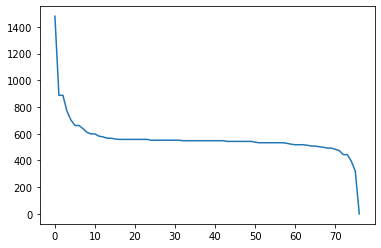

In [85]:
new_length = rinse_len

ratio = math.ceil(col.size/new_length) 
ratio_float = (col.size/new_length) 

print("Model Size: " + str(col.size) +
      "\nDate Size: " +  str(new_length) +
      "\nRatio: " + str(ratio) +
      "\nNew Length " + str(col.size/ratio))
        
j = 0

scaled_model = []
while (j<col.size-1):    
    
    closest_idx = round(j)   
    scaled_model.append(col.loc[closest_idx])
    j+= ratio_float

plt.plot(scaled_model)
 

# Compare

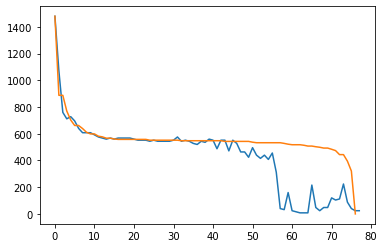

In [86]:
plt.plot(rinse_data)
plt.plot(scaled_model)

i = 0
